In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [160]:
telecom=pd.read_csv(r'C:\Users\rohini\Downloads\telecom_churn_data.csv')

In [161]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

### Inspecting the data set

In [162]:
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [163]:
telecom.shape

(99999, 226)

In [164]:
telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

### Finding the high value customer

#### As per the problem statement,High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months

In [167]:
all_columns = telecom.columns.tolist()
recharge_col = [col for col in all_columns if 'rech' in col]
recharge_col

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

Lets find the total amount spent on data recharge from the given data,i.e 'average recharge amount for every month and total number of recharges done.
We find the product to derive the total amount recharged for data

In [169]:
telecom['total_data_rech_amt_6'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']
telecom['total_data_rech_amt_7'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7']
telecom['total_data_rech_amt_8'] = telecom['av_rech_amt_data_8'] * telecom['total_rech_data_8']
telecom['total_data_rech_amt_9'] = telecom['av_rech_amt_data_9'] * telecom['total_rech_data_9']

In [170]:
# Dropping those columns that were used to derive the new feature - total amount spent on data recharge.
telecom.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)

In [171]:
telecom.shape

(99999, 222)

In [172]:
# As per the problem statement,the high value customer is identified based on the average value of the total amount spent on data recharge and total amount spent on voice recharge

In [173]:
avg_recharge_amt_6_7=( telecom['total_rech_amt_6'].fillna(0) + telecom['total_rech_amt_7'].fillna(0) +
                               telecom['total_data_rech_amt_6'].fillna(0) + telecom['total_data_rech_amt_7'].fillna(0) ) / 2
     

In [174]:
# Finding the 70th percentile of the average amountof both 6th and 7th month
avg_recharge_amt_6_7_70 = np.percentile(avg_recharge_amt_6_7, 70.0)
print(f'70 Percentile of recharge amount is : {avg_recharge_amt_6_7_70}')

# Keep high value customer data

telecom_hv = telecom[avg_recharge_amt_6_7 >= avg_recharge_amt_6_7_70 ]

print(f'Shape of high value customer data: {telecom_hv.shape}')

70 Percentile of recharge amount is : 478.0
Shape of high value customer data: (30001, 222)


### Tagging 'Churn

In [176]:
# tagging the customers as Churn equal to 0 or 1 is based on the condition that the customer doesnt make voice calls or use data in the 9th month.

In [177]:
# I.e total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9 is zero.

In [178]:
telecom_hv['churn'] = np.where(telecom_hv[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
telecom_hv.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6  ...  aon  aug_vbc_3g  jul_vbc_3g  \
0             9/30/2014   197.385  ...  968       30.40        0.00   
7             9/30/2014  1069.180  ...  802       57.74       19.38   
8             9/30/2014   378.721  ...  315       21.03      910.65   
21            9/30/2014   514.453  ...  720        0.00        0.00   
23            9/30/2014    74.350  ...  604       40.45       51.86   

    jun_vbc_3g  sep_vbc_3g  total_data_rech_amt_6  total_data_rech_amt_7  \
0       101.20        3.58                  252.0                  252.0   
7        18.74        0.00                    NaN                    NaN   
8       122.16        0.00                    NaN                  354.0   
21        0.00        0.00                    NaN                    NaN   
23        0.00        0.00                    NaN                  712.0   

    total_data_rech_amt_8  total_data_rech_amt_9  churn  
0                   252.0                    NaN      1  
7                     NaN                    NaN      1  
8                   207.0                    NaN      0  
21                    NaN                    NaN      0  
23                  540.0                  252.0      0  

[5 rows x 223 columns]

In [179]:
telecom_hv.shape

(30001, 223)

Calculating churn percentage

In [181]:
telecom_hv['churn'].value_counts(normalize=True)

churn
0    0.918636
1    0.081364
Name: proportion, dtype: float64

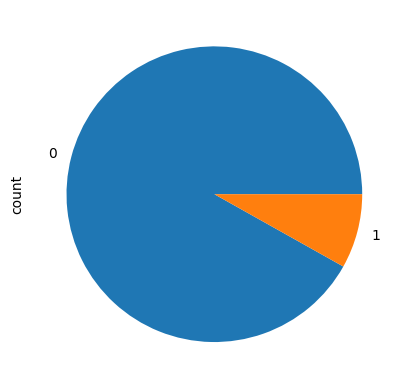

In [182]:
((telecom_hv['churn'].value_counts()/len(telecom_hv))*100).plot(kind="pie")
plt.show()

In [183]:
## telecom_hv= telecom_hv.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

In [184]:
month9_col=[col for col in all_columns if '9' in col]

In [185]:
month9_col

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [186]:
telecom_hv_work=telecom_hv.copy()

In [187]:
telecom_hv.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8', 'total_data_rech_amt_9', 'churn'],
      dtype='object', length=223)

In [188]:
# Dropping Month 9 Columns

telecom_hv_work.drop(['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9'],
                axis=1, inplace=True)
telecom_hv_work.shape

(30001, 171)

In [189]:
telecom_hv_work.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8', 'total_data_rech_amt_9', 'churn'],
      dtype='object', length=171)

### Data cleaning and EDA

In [190]:
# Checking for missing values
missing_values = round(telecom_hv_work.isna().sum() / len(telecom_hv_work) * 100, 2).sort_values(ascending=False)
missing_values

total_data_rech_amt_9    49.27
arpu_3g_8                46.83
total_data_rech_amt_8    46.83
fb_user_8                46.83
max_rech_data_8          46.83
                         ...  
vol_2g_mb_6               0.00
vol_2g_mb_7               0.00
vol_2g_mb_8               0.00
vol_3g_mb_6               0.00
churn                     0.00
Length: 171, dtype: float64

In [191]:
# Select columns with more than 40% missing values

drop_missing_col = missing_values[missing_values > 40].index.tolist()
drop_missing_col

['total_data_rech_amt_9',
 'arpu_3g_8',
 'total_data_rech_amt_8',
 'fb_user_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'night_pck_user_8',
 'date_of_last_rech_data_8',
 'arpu_2g_8',
 'arpu_3g_6',
 'max_rech_data_6',
 'total_data_rech_amt_6',
 'night_pck_user_6',
 'fb_user_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'arpu_2g_6',
 'date_of_last_rech_data_7',
 'total_data_rech_amt_7',
 'max_rech_data_7',
 'arpu_3g_7',
 'count_rech_2g_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'night_pck_user_7',
 'fb_user_7']

In [192]:
# Drop columns those are having higher than 40% missing

telecom_hv_work.drop(drop_missing_col, axis=1, inplace=True)
telecom_hv_work.shape

(30001, 143)

In [193]:
# Re-check missing values

round(telecom_hv_work.isna().sum() / len(telecom_hv_work) * 100, 2).sort_values(ascending=False)

loc_ic_mou_8          3.91
og_others_8           3.91
loc_og_t2f_mou_8      3.91
loc_ic_t2t_mou_8      3.91
spl_og_mou_8          3.91
                      ... 
max_rech_amt_6        0.00
max_rech_amt_7        0.00
max_rech_amt_8        0.00
last_day_rch_amt_6    0.00
churn                 0.00
Length: 143, dtype: float64

In [194]:
telecom_hv_work.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'churn'],
      dtype='object', length=143)

In [195]:
## lets drop the columns that have missing values less than 4%

for col in telecom_hv_work.columns:
    telecom_hv_work = telecom_hv_work[~telecom_hv_work[col].isna()]


In [196]:
# Re-check missing values

round(telecom_hv_work.isna().sum() / len(telecom_hv_work) * 100, 2).sort_values(ascending=False)

mobile_number       0.0
isd_ic_mou_6        0.0
total_ic_mou_6      0.0
total_ic_mou_7      0.0
total_ic_mou_8      0.0
                   ... 
std_og_t2c_mou_7    0.0
std_og_t2c_mou_8    0.0
std_og_mou_6        0.0
std_og_mou_7        0.0
churn               0.0
Length: 143, dtype: float64

In [197]:
### now we dont have any missing values present.


In [198]:
## Lets drop the mobile number column as it doesnt make any value in prediction.
telecom_hv_work.drop('mobile_number', axis = 1, inplace = True)
telecom_hv_work.shape

(28163, 142)

In [199]:
### also lets drop the columns that have only unique values

In [200]:
unique_1_col=[]
for i in telecom_hv_work.columns:
    if telecom_hv_work[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass

telecom_hv_work.drop(unique_1_col, axis=1, inplace = True)
print("\n The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model\n",
      unique_1_col)


 The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [201]:
telecom_hv_work.shape

(28163, 129)

In [202]:
# Removing date columns because they dont add any value to our pediction.
date_column = [col for col in telecom_hv_work.columns if 'date' in col]
telecom_hv_work.drop(date_column, axis = 1, inplace = True)
## [col for col in telecom_hv_work.columns if 'date' in col]

In [203]:
telecom_hv_work.shape

(28163, 126)

In [204]:
## Lets check the coorelation between various features and remove those features that have high correlation.

corr = telecom_hv_work.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7       arpu_6         0.728704
arpu_8       arpu_6         0.671437
             arpu_7         0.778413
onnet_mou_7  onnet_mou_6    0.770224
onnet_mou_8  onnet_mou_6    0.646114
                              ...   
aug_vbc_3g   vol_3g_mb_8    0.620313
jul_vbc_3g   vol_3g_mb_7    0.651025
             aug_vbc_3g     0.706559
jun_vbc_3g   vol_3g_mb_6    0.662497
             jul_vbc_3g     0.680020
Length: 207, dtype: float64

In [205]:
# Lets drop these columns
drop_col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7',
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

In [206]:
# Drop the high corr columns
telecom_hv_work.drop(drop_col_corr, axis=1, inplace=True)

In [207]:
telecom_hv_work.shape

(28163, 87)

### Deriving new features to understand better.


In [209]:
# Creating a total mou instead of offnet and onnet

telecom_hv_work['total_mou_6'] = telecom_hv_work['onnet_mou_6'] + telecom_hv_work['offnet_mou_6']
telecom_hv_work['total_mou_7'] = telecom_hv_work['onnet_mou_7'] + telecom_hv_work['offnet_mou_7']
telecom_hv_work['total_mou_8'] = telecom_hv_work['onnet_mou_8'] + telecom_hv_work['offnet_mou_8']

# Droping the redundant columns

telecom_hv_work.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)


In [210]:
telecom_hv_work.shape

(28163, 84)

In [211]:
# Lets derive the features based on the average values of good phase,This will help us analyse the data.


In [212]:
col_for_6_7 = [col[:-2] for col in telecom_hv_work.columns if '6' in col or '7' in col]

# Creating new feature and drop the redundant columns
for col in set(col_for_6_7):
    telecom_hv_work[f'gd_ph_{col}'] = ( telecom_hv_work[f'{col}_6'] + telecom_hv_work[f'{col}_7'] ) / 2
    telecom_hv_work.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)



In [213]:
telecom_hv_work.head()


arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
7   3171.480          31.64          38.06              0.00        255.79   
8    137.362           0.00           0.00              7.15         63.04   
21   637.760           0.00           0.00              0.00        129.74   
23   366.966           0.00           0.00             17.71        182.14   
33   409.230           0.00           0.00              0.56          0.00   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
21              0.00        938.79          0.00          0.00          0.0   
23              0.00         39.61          0.00         17.71          0.0   
33              0.00          0.00          0.00          0.56          0.0   

    ...  gd_ph_monthly_3g  gd_ph_spl_ic_mou  gd_ph_og_others  \
7   ...               0.0             0.105              0.0   
8   ...               0.0             0.000              0.0   
21  ...               0.0             0.000              0.0   
23  ...               1.0             0.000              0.0   
33  ...               4.5             0.000              0.0   

    gd_ph_std_og_mou  gd_ph_ic_others  gd_ph_max_rech_amt  gd_ph_loc_og_mou  \
7             68.000           15.465              1185.0           478.035   
8            136.870            0.000               122.0           333.135   
21           848.990            0.000                50.0            95.565   
23             4.355            2.675                89.5           132.795   
33             0.000            0.940               753.5             0.000   

    gd_ph_vol_2g_mb  gd_ph_last_day_rch_amt  gd_ph_total_rech_num  
7             0.000                     0.0                   5.0  
8           178.000                    25.0                  20.0  
21            0.000                    25.0                  24.0  
23            0.240                    89.5                   4.0  
33           72.405                   126.0                  10.5  

[5 rows x 58 columns]

In [214]:
telecom_hv_work.shape

(28163, 58)

In [215]:
# Here we have missed out the Vbc columns as they dont  have the month as prefix.So we will rename and add it to our analysis.

In [216]:
# Creating new column

telecom_hv_work['gd_ph_vbc_3g'] = ( telecom_hv_work['jul_vbc_3g'] + telecom_hv_work['jun_vbc_3g'] ) / 2

# Droping redundant column

telecom_hv_work.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis = 1, inplace = True)

# Renaming the august column for vbc to vbc_3g_8

telecom_hv_work['vbc_3g_8'] = telecom_hv_work['aug_vbc_3g']
telecom_hv_work.drop('aug_vbc_3g', axis=1, inplace = True)



In [217]:
telecom_hv_work.shape

(28163, 56)

In [218]:
telecom_hv_work.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
7   3171.480          31.64          38.06              0.00        255.79   
8    137.362           0.00           0.00              7.15         63.04   
21   637.760           0.00           0.00              0.00        129.74   
23   366.966           0.00           0.00             17.71        182.14   
33   409.230           0.00           0.00              0.56          0.00   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
21              0.00        938.79          0.00          0.00          0.0   
23              0.00         39.61          0.00         17.71          0.0   
33              0.00          0.00          0.00          0.56          0.0   

    ...  gd_ph_og_others  gd_ph_std_og_mou  gd_ph_ic_others  \
7   ...              0.0            68.000           15.465   
8   ...              0.0           136.870            0.000   
21  ...              0.0           848.990            0.000   
23  ...              0.0             4.355            2.675   
33  ...              0.0             0.000            0.940   

    gd_ph_max_rech_amt  gd_ph_loc_og_mou  gd_ph_vol_2g_mb  \
7               1185.0           478.035            0.000   
8                122.0           333.135          178.000   
21                50.0            95.565            0.000   
23                89.5           132.795            0.240   
33               753.5             0.000           72.405   

    gd_ph_last_day_rch_amt  gd_ph_total_rech_num  gd_ph_vbc_3g  vbc_3g_8  
7                      0.0                   5.0        19.060     57.74  
8                     25.0                  20.0       516.405     21.03  
21                    25.0                  24.0         0.000      0.00  
23                    89.5                   4.0        25.930     40.45  
33                   126.0                  10.5      2210.750    358.10  

[5 rows x 56 columns]

In [219]:
# Reseting the index

telecom_hv_work.reset_index(inplace=True, drop=True)
telecom_hv_work.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0  3171.480          31.64          38.06              0.00        255.79   
1   137.362           0.00           0.00              7.15         63.04   
2   637.760           0.00           0.00              0.00        129.74   
3   366.966           0.00           0.00             17.71        182.14   
4   409.230           0.00           0.00              0.56          0.00   

   std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0             16.68         77.84         10.01          6.50          0.0   
1              0.00         98.28          0.00         10.23          0.0   
2              0.00        938.79          0.00          0.00          0.0   
3              0.00         39.61          0.00         17.71          0.0   
4              0.00          0.00          0.00          0.56          0.0   

   ...  gd_ph_og_others  gd_ph_std_og_mou  gd_ph_ic_others  \
0  ...              0.0            68.000           15.465   
1  ...              0.0           136.870            0.000   
2  ...              0.0           848.990            0.000   
3  ...              0.0             4.355            2.675   
4  ...              0.0             0.000            0.940   

   gd_ph_max_rech_amt  gd_ph_loc_og_mou  gd_ph_vol_2g_mb  \
0              1185.0           478.035            0.000   
1               122.0           333.135          178.000   
2                50.0            95.565            0.000   
3                89.5           132.795            0.240   
4               753.5             0.000           72.405   

   gd_ph_last_day_rch_amt  gd_ph_total_rech_num  gd_ph_vbc_3g  vbc_3g_8  
0                     0.0                   5.0        19.060     57.74  
1                    25.0                  20.0       516.405     21.03  
2                    25.0                  24.0         0.000      0.00  
3                    89.5                   4.0        25.930     40.45  
4                   126.0                  10.5      2210.750    358.10  

[5 rows x 56 columns]

In [324]:
telecom_hv_work.describe()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  \
count  28163.000000   28163.000000   28163.000000      28163.000000   
mean     526.756667      13.145865      20.926258          1.789363   
std      430.671701      76.125433     107.722393          7.390599   
min     -345.129000       0.000000       0.000000          0.000000   
25%      258.075500       0.000000       0.000000          0.000000   
50%      445.338000       0.000000       0.000000          0.000000   
75%      675.208500       0.000000       0.000000          0.130000   
max     7000.000000    4169.810000    5337.040000        351.830000   

       loc_og_mou_8  std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  \
count  28163.000000      28163.000000  28163.000000  28163.000000   
mean     246.972940          1.646062    322.121339      1.989213   
std      352.606733         11.126142    615.275135     45.888765   
min        0.000000          0.000000      0.000000      0.000000   
25%       31.410000          0.000000      0.000000      0.000000   
50%      124.060000          0.000000     34.990000      0.000000   
75%      325.160000          0.000000    392.840000      0.000000   
max     4000.000000        516.910000  13980.060000   5681.540000   

       spl_og_mou_8   og_others_8  ...  gd_ph_og_others  gd_ph_std_og_mou  \
count  28163.000000  28163.000000  ...     28163.000000      28163.000000   
mean       6.889342      0.061151  ...         0.359434        360.449909   
std       20.813297      3.421503  ...         2.533710        569.505231   
min        0.000000      0.000000  ...         0.000000          0.000000   
25%        0.000000      0.000000  ...         0.000000          2.450000   
50%        0.700000      0.000000  ...         0.000000         66.560000   
75%        6.640000      0.000000  ...         0.000000        543.692500   
max      954.510000    394.930000  ...       304.905000       4000.000000   

       gd_ph_ic_others  gd_ph_max_rech_amt  gd_ph_loc_og_mou  gd_ph_vol_2g_mb  \
count     28163.000000        28163.000000      28163.000000     28163.000000   
mean          1.371220          167.277847        261.660170       127.717157   
std          14.081974          141.862512        347.579232       304.044111   
min           0.000000            0.000000          0.000000         0.000000   
25%           0.000000          104.000000         45.762500         0.000000   
50%           0.000000          128.000000        140.590000         6.505000   
75%           0.240000          198.000000        347.185000       110.375000   
max        1420.040000         1500.000000       3000.000000      7939.075000   

       gd_ph_last_day_rch_amt  gd_ph_total_rech_num  gd_ph_vbc_3g  \
count            28163.000000          28163.000000  28163.000000   
mean                98.113873             12.026489    169.310408   
std                102.635882              8.650631    395.513994   
min                  0.000000              1.000000      0.000000   
25%                 30.000000              6.500000      0.000000   
50%                 77.000000              9.500000      0.000000   
75%                124.000000             14.500000    157.682500   
max               1000.000000            155.500000   8190.585000   

           vbc_3g_8  
count  28163.000000  
mean     173.745705  
std      424.621028  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%      142.470000  
max    12916.220000  

[8 rows x 56 columns]

In [221]:
# Here we find outliers in almost all columns,and we can treat it subsequently

### Univariate Analysis

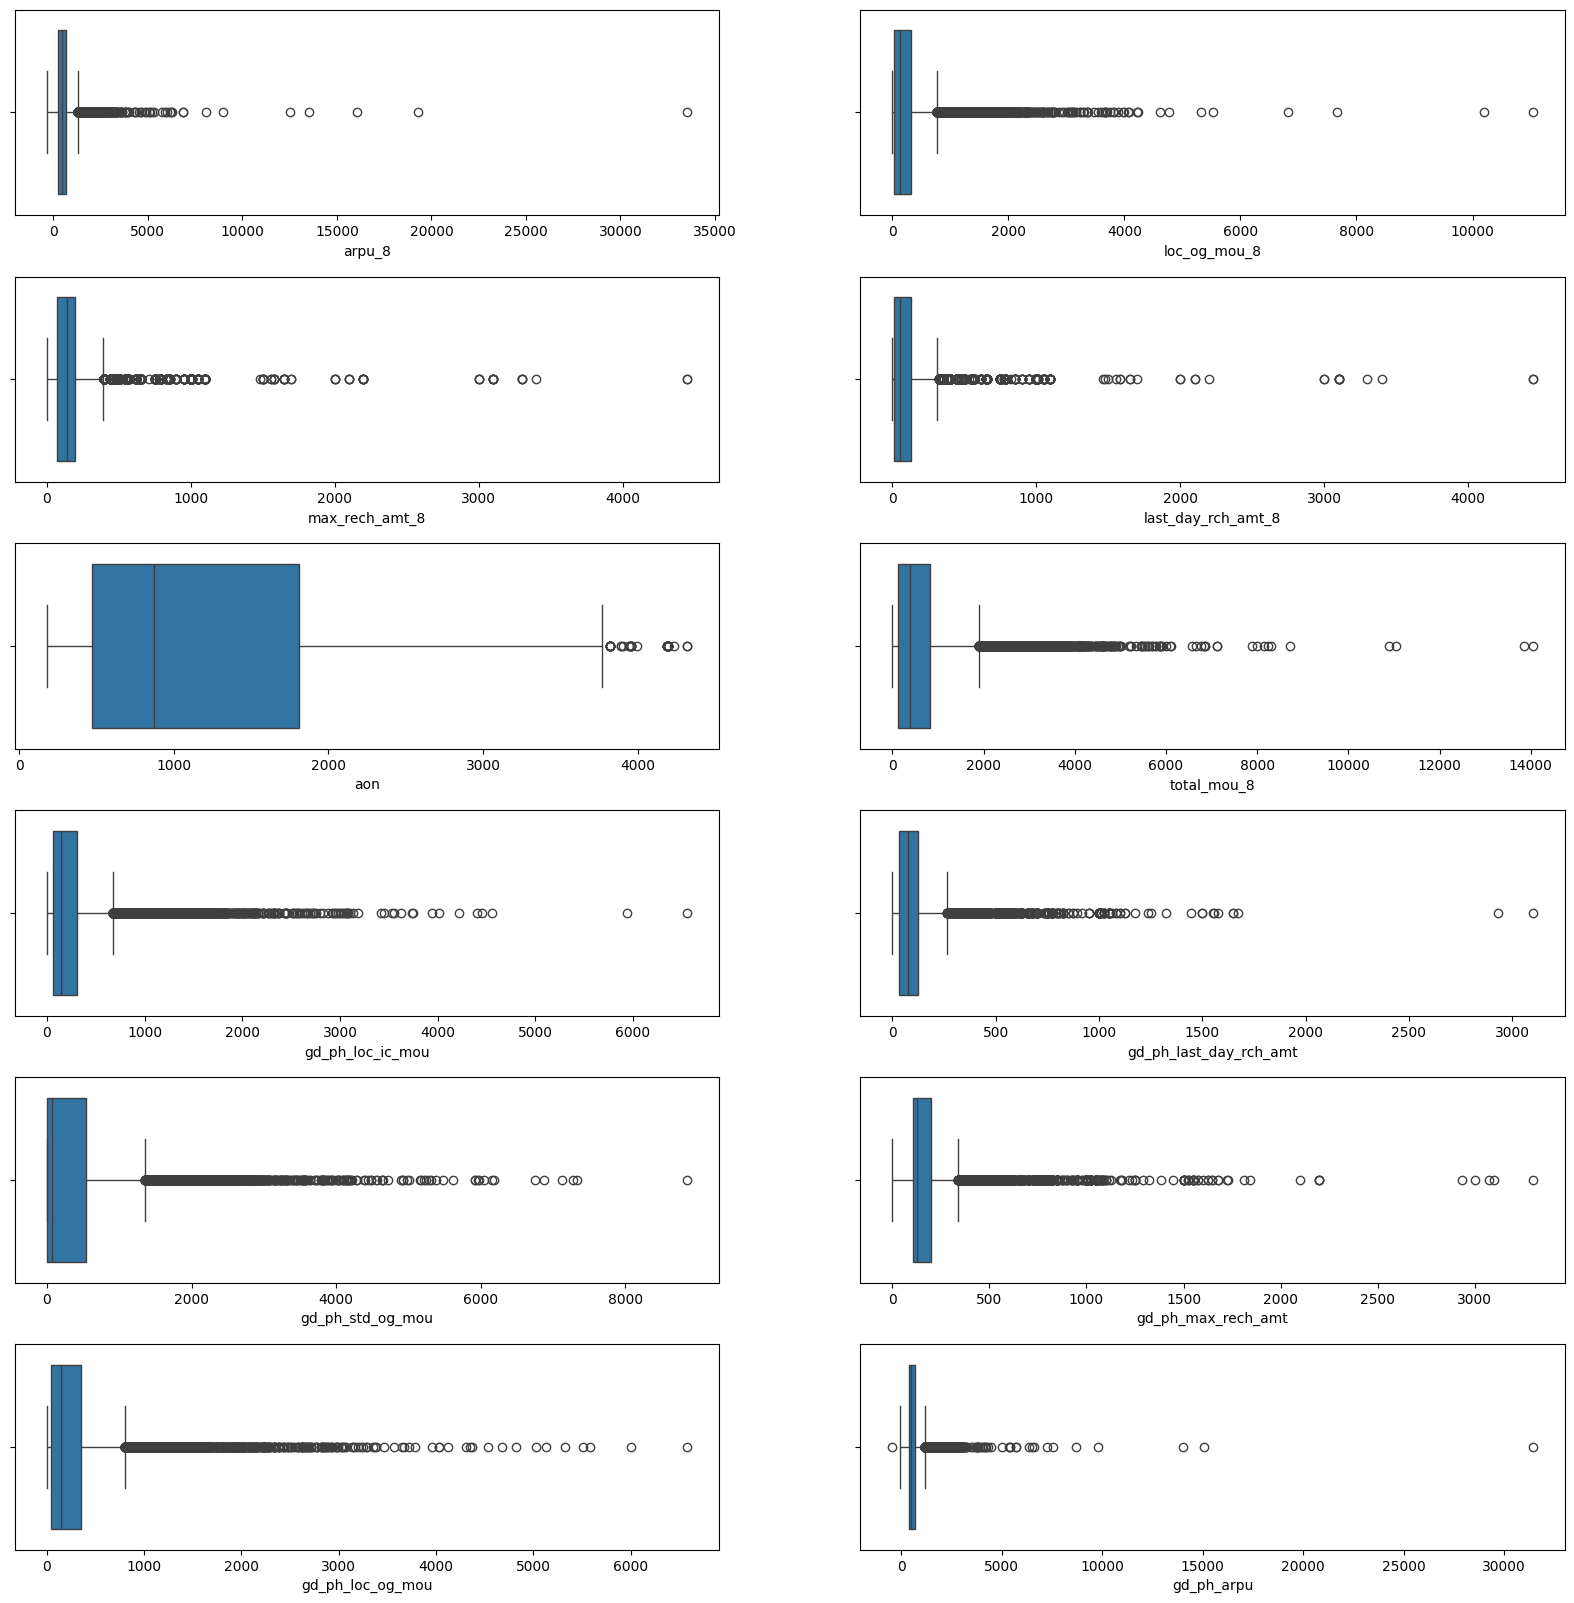

In [222]:
# lets drwa a boxplot for few features that are useful inspecting

# List of features to be analyzed
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8',
               'gd_ph_loc_ic_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt',
              'gd_ph_loc_og_mou', 'gd_ph_arpu']

# Plot boxplots for each variable
fig, axes = plt.subplots(6, 2, figsize=(20, 20))
# sns.boxplot(x=telecom_hv_work['arpu_8'], ax=axes[0])
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 2)
    sns.boxplot(telecom_hv_work[col], ax = axes[i, j], orient = "h")

plt.subplots_adjust(hspace=0.3)
plt.show()

In [223]:
## From teh above figure lets fix the upper cap of individual features accordingly 
# | Feature | Value | | --- | --- | | arpu_8 | 7000| | loc_og_mou_8 | 4000| | max_rech_amt_8 | 1000 | | last_day_rch_amt_8 | 1000 | | aon | 3000 | | total_mou_8 | 4000 | | gd_ph_loc_ic_mou | 3000 | | gd_ph_last_day_rch_amt | 1000 | | gd_ph_std_og_mou | 4000 | | gd_ph_max_rech_amt | 1500 | | gd_ph_loc_og_mou | 3000 | | gd_ph_arpu | 7000 |
# We will cap these values in the subsequent steps.

### Bivariate Analysis

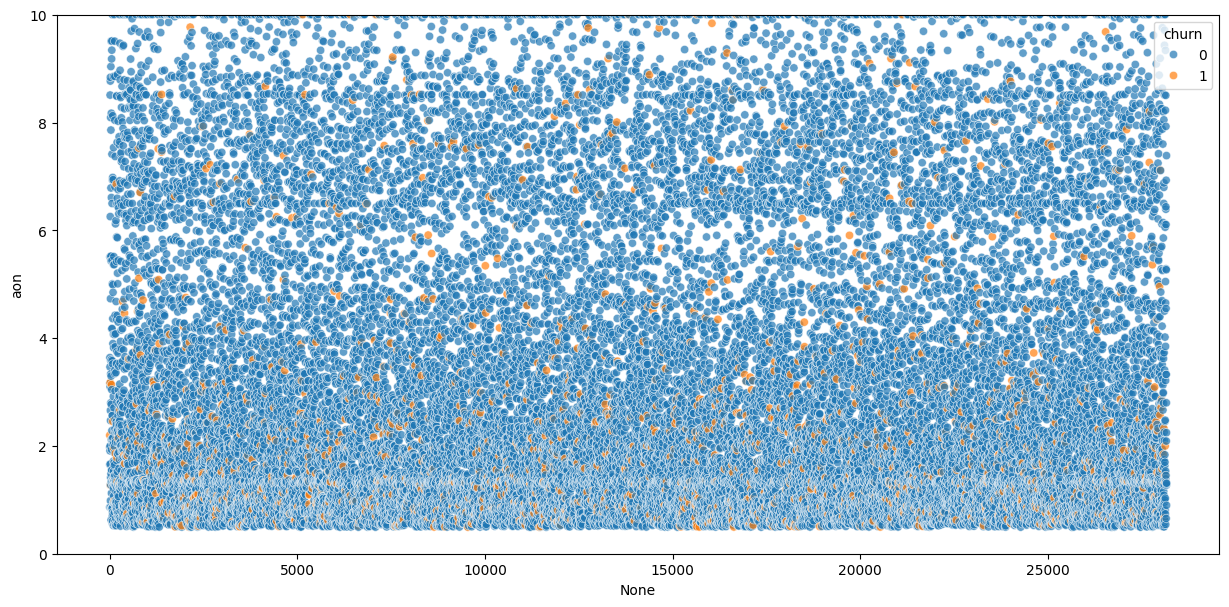

In [227]:
# Checking churn based on tenure

plt.figure(figsize=(15,7))
sns.scatterplot(y=telecom_hv_work['aon'] / 365, x=telecom_hv_work.index, hue=telecom_hv_work.churn, alpha=0.7)
plt.ylim(0,10)
plt.show()

In [ ]:
# here we observe that those customers who have the tenure of less than 4 years turn to churn more.

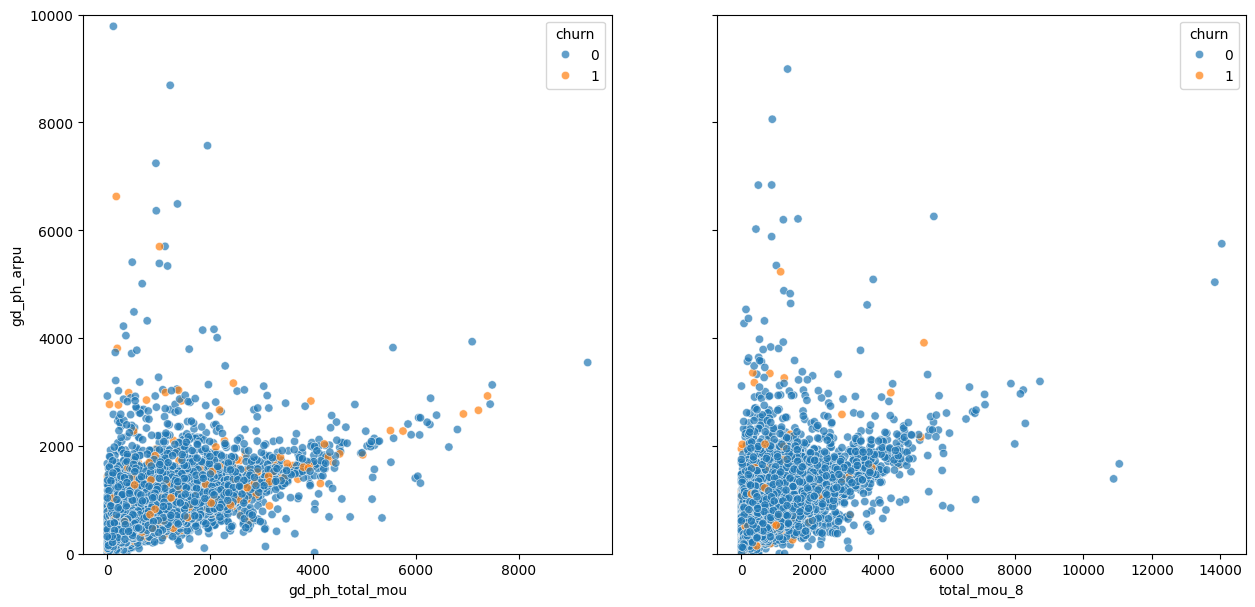

In [231]:
# Checking teh effect of vbc on revenue

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y = 'gd_ph_arpu', x = 'gd_ph_total_mou', data = telecom_hv_work, ax = axes[0], hue = 'churn', alpha = 0.7)
sns.scatterplot(y = 'arpu_8', x = 'total_mou_8', data = telecom_hv_work, ax = axes[1], hue = 'churn', alpha = 0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

In [232]:
# here we find that MOU dropped significantly in the month_8 for the churners thus reducing the revenue.

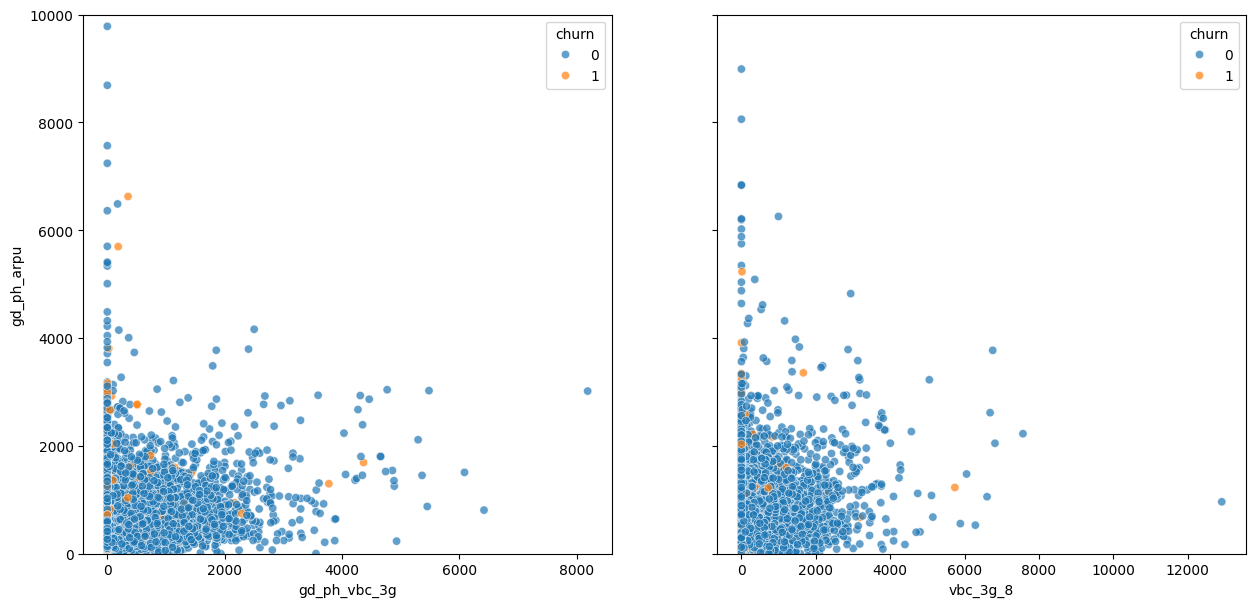

In [233]:
# lets observe how the total_mou effects the revenue

fig, axes = plt.subplots(1, 2, sharey = True, figsize = (15, 7))
sns.scatterplot(y = 'gd_ph_arpu', x = 'gd_ph_vbc_3g', data = telecom_hv_work, ax = axes[0], hue = 'churn', alpha = 0.7)
sns.scatterplot(y = 'arpu_8', x = 'vbc_3g_8', data = telecom_hv_work, ax = axes[1], hue = 'churn', alpha = 0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

In [234]:
# We find that there is increase in revenue when the VBC usage is less.

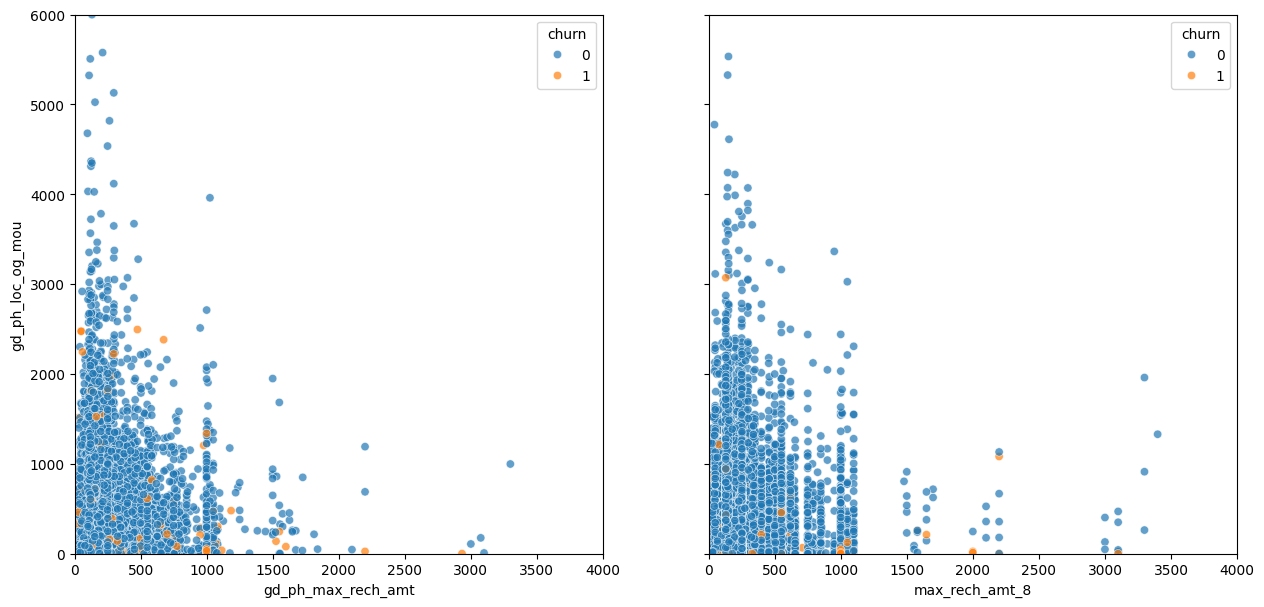

In [235]:
# lets observe the relation between recharge amount and local outgoing calls

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x = 'gd_ph_max_rech_amt', y = 'gd_ph_loc_og_mou', data = telecom_hv_work, ax = axes[0],
                hue = 'churn', alpha = 0.7)
sns.scatterplot(x = 'max_rech_amt_8', y = 'loc_og_mou_8', data = telecom_hv_work, ax = axes[1], hue = 'churn', alpha = 0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,4000)
axes[1].set_xlim(0,4000)
plt.ylim(0,6000)

plt.show()

In [236]:
# We find that the users whose recharge is high,used the local outgoing more.
# Also we find thet people whose max recharge amount as well as local out going were very less even in the good phase churned more.

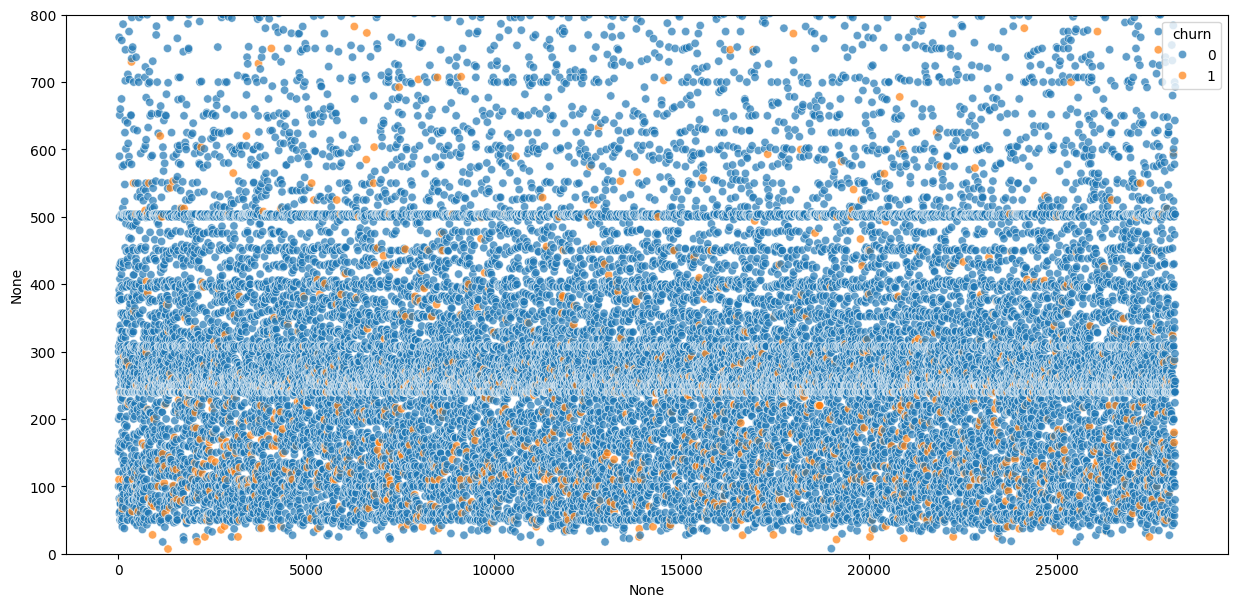

In [237]:
# Checking the effect of max recharge amount on churn

plt.figure(figsize = (15,7))
sns.scatterplot(x = telecom_hv_work.index, y = telecom_hv_work['gd_ph_max_rech_amt'] + telecom_hv_work['max_rech_amt_8'],
                hue=telecom_hv_work['churn'], alpha = 0.7)
plt.ylim(0,800)
plt.show()

In [238]:
# We find that users who had the max recharge amount less than 200 churned more

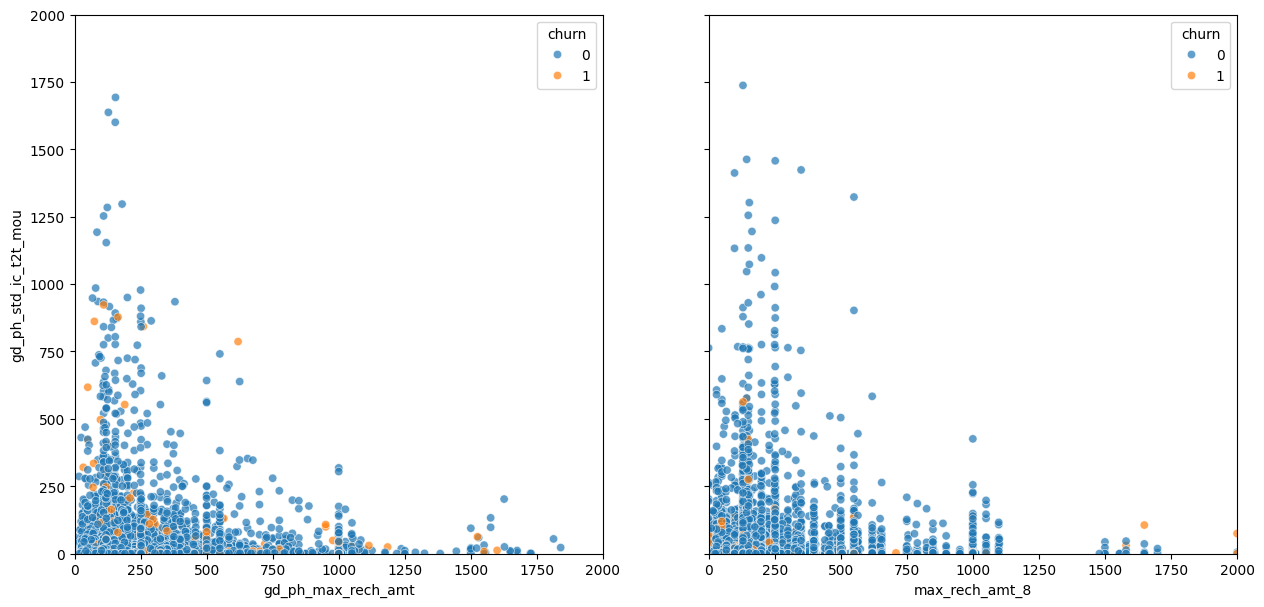

In [240]:
# observing how Incoming from the same service provider affects the recharge amount

fig, axes = plt.subplots(1, 2, sharey = True, figsize = (15, 7))
sns.scatterplot(x = 'gd_ph_max_rech_amt', y = 'gd_ph_std_ic_t2t_mou', data = telecom_hv_work, ax = axes[0],
                hue ='churn', alpha = 0.7)
sns.scatterplot(x = 'max_rech_amt_8', y = 'std_ic_t2t_mou_8', data = telecom_hv_work, ax = axes[1], hue = 'churn', alpha = 0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,2000)
axes[1].set_xlim(0,2000)
plt.ylim(0,2000)

plt.show()

In [241]:
# We observe that those users who have max recharge amount on the higher end and still have low incoming call mou during the good pahse, churned out more

Lets observe the target variable 'churn' using distplot

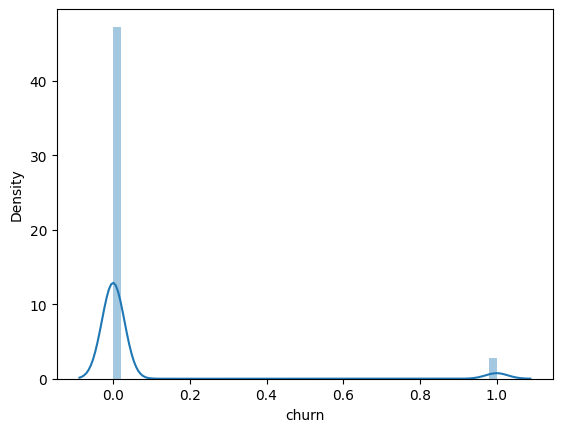

In [243]:
sns.distplot(telecom_hv_work['churn'])
plt.show()

In [244]:
# Here we find that the target variable is highly imbalanced.We can handle this class imbalance using SMOTE technique.

In [245]:
# Treating the outliers

In [246]:
col_upr_lmt = [('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ),
               ('aon', 3000), ('total_mou_8', 4000), ('gd_ph_loc_ic_mou', 3000), ('gd_ph_last_day_rch_amt', 1000 ),
               ('gd_ph_std_og_mou', 4000), ('gd_ph_max_rech_amt', 1500), ('gd_ph_loc_og_mou', 3000), ('gd_ph_arpu', 7000)]

for col, value in col_upr_lmt:
    telecom_hv_work[col] = telecom_hv_work[col].apply(lambda x : x if x < value else value)

telecom_hv_work[col_boxplot].head()

arpu_8  loc_og_mou_8  max_rech_amt_8  last_day_rch_amt_8   aon  \
0  3171.480        255.79            1000                 779   802   
1   137.362         63.04              30                  10   315   
2   637.760        129.74              50                  50   720   
3   366.966        182.14             179                   0   604   
4   409.230          0.00             455                 455  1328   

   total_mou_8  gd_ph_loc_ic_mou  gd_ph_last_day_rch_amt  gd_ph_std_og_mou  \
0       378.20           391.555                     0.0            68.000   
1       171.56            52.630                    25.0           136.870   
2      1068.53           106.505                    25.0           848.990   
3       239.47           145.520                    89.5             4.355   
4         0.00             2.180                   126.0             0.000   

   gd_ph_max_rech_amt  gd_ph_loc_og_mou  gd_ph_arpu  
0              1185.0           478.035   1209.5150  
1               122.0           333.135    435.4720  
2                50.0            95.565    556.1030  
3                89.5           132.795    134.1235  
4               753.5             0.000   1669.9265

In [247]:
X = telecom_hv_work.drop('churn', axis = 1)
y = telecom_hv_work['churn']

In [248]:
# Standardisation

In [249]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

### Handling class imbalance using SMOTE technique

In [251]:
telecom_hv_work.churn.value_counts()

churn
0    26625
1     1538
Name: count, dtype: int64

In [253]:
# Using SMOTE to take care of class imbalance

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42, k_neighbors = 5)
X_res, y_res = sm.fit_resample(X, y)

In [254]:
y_res.value_counts()

churn
1    26625
0    26625
Name: count, dtype: int64

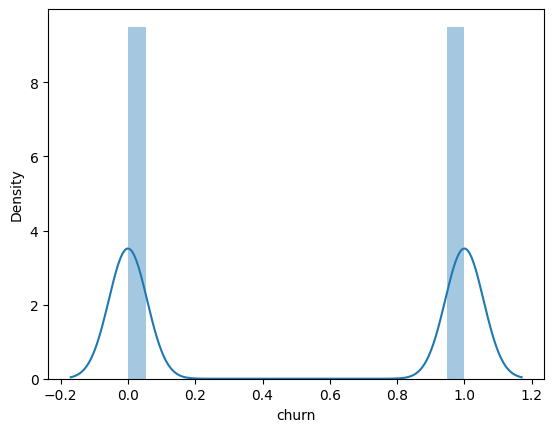

In [255]:
sns.distplot(y_res)
plt.show()

In [256]:
# NOw the target variable is balanced.

### PCA

In [258]:
X.shape

(28163, 55)

In [259]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 25)
X_pca = pca.fit_transform(X_res)
X_pca.shape

(53250, 25)

### Model building

In [261]:
# Lets use the original X and y for Logistic regression and use RFE to select the important features.

In [262]:
# Splitting into train and test dataset.

In [263]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size = 0.7, test_size = 0.3, random_state = 25)

In [264]:
import statsmodels.api as sm

## Logistic regression first model:

In [266]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37219
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Tue, 09 Apr 2024   Deviance:                       31704.
Time:                        12:50:24   Pearson chi2:                 2.59e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4148
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.6129      0.025    -64.019      0.000      -1.662      -1.564
arpu_8                     0.1800      0.051      3.544      0.000       0.080       0.279
roam_ic_mou_8             -0.0024      0.017     -0.140      0.889      -0.036       0.031
roam_og_mou_8              0.1752      0.033      5.385      0.000       0.111       0.239
loc_og_t2c_mou_8           0.1610      0.025      6.372      0.000       0.112       0.211
loc_og_mou_8              -0.5171      0.096     -5.409      0.000      -0.705      -0.330
std_og_t2f_mou_8          -0.0964      0.040     -2.399      0.016      -0.175      -0.018
std_og_mou_8              -0.0596      0.127     -0.471      0.638      -0.307       0.188
isd_og_mou_8              -0.0684      0.072     -0.951      0.342      -0.209       0.073
spl_og_mou_8              -0.3055      0.040     -7.679      0.000      -0.384      -0.228
og_others_8                0.0725      0.017      4.214      0.000       0.039       0.106
loc_ic_mou_8              -1.7083      0.067    -25.364      0.000      -1.840      -1.576
std_ic_t2t_mou_8          -0.3094      0.062     -5.019      0.000      -0.430      -0.189
std_ic_t2f_mou_8          -0.1193      0.061     -1.957      0.050      -0.239       0.000
std_ic_mou_8              -0.4488      0.059     -7.571      0.000      -0.565      -0.333
spl_ic_mou_8              -0.3370      0.025    -13.302      0.000      -0.387      -0.287
isd_ic_mou_8              -0.1722      0.033     -5.222      0.000      -0.237      -0.108
ic_others_8                0.0642      0.039      1.661      0.097      -0.012       0.140
total_rech_num_8          -0.4405      0.035    -12.445      0.000      -0.510      -0.371
max_rech_amt_8             0.1720      0.026      6.725      0.000       0.122       0.222
last_day_rch_amt_8        -0.4628      0.022    -20.687      0.000      -0.507      -0.419
vol_2g_mb_8               -0.2522      0.033     -7.755      0.000      -0.316      -0.188
monthly_2g_8              -0.5843      0.032    -18.535      0.000      -0.646      -0.522
sachet_2g_8               -0.6044      0.033    -18.113      0.000      -0.670      -0.539
monthly_3g_8              -0.8178      0.041    -20.134      0.000      -0.897      -0.738
sachet_3g_8               -0.2727      0.036     -7.632      0.000      -0.343      -0.203
aon                       -0.3156      0.018    -17.911      0.000      -0.350      -0.281
total_mou_8               -0.5451      0.141     -3.870      0.000      -0.821      -0.269
gd_ph_sachet_2g            0.0679      0.025      2.710      0.007       0.019       0.117
gd_ph_std_ic_mou           0.0951      0.038      2.497      0.013       0.020       0.170
gd_ph_loc_ic_mou           0.6759      0.046     14.784      0.000       0.586  

### Lets use RFE for feature selection:

In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Creating Logistic Regressor object

logreg = LogisticRegression(solver = 'liblinear')

# Running RFE for 25 features

rfe = RFE(logreg, n_features_to_select = 25)
rfe = rfe.fit(X_train, y_train)

In [269]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'roam_og_mou_8', 'loc_og_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'aon', 'total_mou_8', 'gd_ph_loc_ic_mou',
       'gd_ph_std_ic_t2t_mou', 'gd_ph_roam_og_mou', 'gd_ph_monthly_2g',
       'gd_ph_std_og_mou', 'gd_ph_ic_others', 'gd_ph_loc_og_mou',
       'gd_ph_vol_2g_mb', 'gd_ph_total_rech_num'],
      dtype='object')

In [270]:
# Building model with RFE selected features

X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37249
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16039.
Date:                Tue, 09 Apr 2024   Deviance:                       32077.
Time:                        12:53:10   Pearson chi2:                 8.87e+08
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4089
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5625      0.025    -63.607      0.000      -1.611      -1.514
arpu_8                   0.1991      0.032      6.318      0.000       0.137       0.261
roam_og_mou_8            0.2018      0.019     10.556      0.000       0.164       0.239
loc_og_mou_8            -0.4709      0.056     -8.428      0.000      -0.580      -0.361
loc_ic_mou_8            -1.7729      0.067    -26.508      0.000      -1.904      -1.642
std_ic_t2t_mou_8        -0.3524      0.058     -6.085      0.000      -0.466      -0.239
std_ic_mou_8            -0.3956      0.042     -9.444      0.000      -0.478      -0.314
spl_ic_mou_8            -0.3612      0.025    -14.364      0.000      -0.411      -0.312
total_rech_num_8        -0.5510      0.033    -16.654      0.000      -0.616      -0.486
max_rech_amt_8           0.1982      0.023      8.485      0.000       0.152       0.244
last_day_rch_amt_8      -0.4781      0.022    -21.806      0.000      -0.521      -0.435
vol_2g_mb_8             -0.2708      0.033     -8.327      0.000      -0.335      -0.207
monthly_2g_8            -0.5853      0.030    -19.189      0.000      -0.645      -0.525
sachet_2g_8             -0.5785      0.027    -21.810      0.000      -0.630      -0.526
monthly_3g_8            -0.7374      0.031    -23.655      0.000      -0.798      -0.676
aon                     -0.3150      0.017    -18.304      0.000      -0.349      -0.281
total_mou_8             -0.6119      0.035    -17.248      0.000      -0.681      -0.542
gd_ph_loc_ic_mou         0.6989      0.045     15.466      0.000       0.610       0.787
gd_ph_std_ic_t2t_mou     0.2689      0.027      9.986      0.000       0.216       0.322
gd_ph_roam_og_mou        0.2093      0.017     12.366      0.000       0.176       0.242
gd_ph_monthly_2g        -0.2134      0.024     -9.081      0.000      -0.259      -0.167
gd_ph_std_og_mou         0.4670      0.024     19.824      0.000       0.421       0.513
gd_ph_ic_others         -0.2094      0.055     -3.824      0.000      -0.317      -0.102
gd_ph_loc_og_mou         0.3110      0.037      8.467      0.000       0.239       0.383
gd_ph_vol_2g_mb          0.2074      0.022      9.380      0.000       0.164       0.251
gd_ph_total_rech_num     0.2561      0.025     10.190      0.000       0.207       0.305
========================================================================================
"""

In [271]:
# Predicting on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      1    0.919473          1
1      0    0.720128          1
2      1    0.785315          1
3      0    0.034398          0
4      1    0.709161          1

In [272]:
from sklearn import metrics

# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy

print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14777  3809]
 [ 2937 15752]]

Accuracy : 0.8190207914151576


In [273]:
# Check for the VIF values of the feature variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           loc_og_mou_8  4.70
0                 arpu_8  4.24
15           total_mou_8  4.16
3           loc_ic_mou_8  4.14
16      gd_ph_loc_ic_mou  3.71
22      gd_ph_loc_og_mou  3.57
7       total_rech_num_8  3.13
8         max_rech_amt_8  2.61
20      gd_ph_std_og_mou  2.36
24  gd_ph_total_rech_num  2.28
4       std_ic_t2t_mou_8  2.26
9     last_day_rch_amt_8  1.99
1          roam_og_mou_8  1.92
10           vol_2g_mb_8  1.86
23       gd_ph_vol_2g_mb  1.84
19      gd_ph_monthly_2g  1.81
5           std_ic_mou_8  1.81
18     gd_ph_roam_og_mou  1.80
11          monthly_2g_8  1.74
17  gd_ph_std_ic_t2t_mou  1.62
12           sachet_2g_8  1.40
13          monthly_3g_8  1.28
14                   aon  1.21
6           spl_ic_mou_8  1.03
21       gd_ph_ic_others  1.01

In [274]:
# Since the vif is well less than 5,we will use this model for prediction.

In [275]:
# Predicting on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      1    0.919473          1
1      0    0.720128          1
2      1    0.785315          1
3      0    0.034398          0
4      1    0.709161          1

In [276]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [277]:
# Checking the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8428487345497352

In [278]:
# Calculating the Specificity

TN / float(TN+FP)

0.7950607984504465

In [279]:
# Calculating false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.20493920154955342


In [280]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8341989386925596


### Plotting ROC

In [282]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

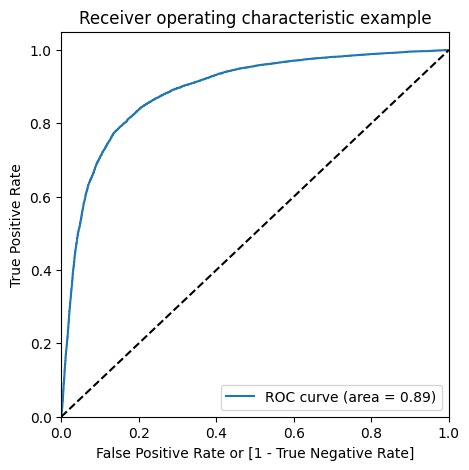

In [283]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding the optimal cutoff point

In [285]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      1    0.919473          1    1    1    1    1    1    1    1    1    1   
1      0    0.720128          1    1    1    1    1    1    1    1    1    0   
2      1    0.785315          1    1    1    1    1    1    1    1    1    0   
3      0    0.034398          0    1    0    0    0    0    0    0    0    0   
4      1    0.709161          1    1    1    1    1    1    1    1    1    0   

   0.9  
0    1  
1    0  
2    0  
3    0  
4    0

In [286]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [ i ,accuracy,sensi,speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.501382  1.000000  0.000000
0.1   0.1  0.663930  0.976778  0.349349
0.2   0.2  0.733655  0.954412  0.511675
0.3   0.3  0.774245  0.923591  0.624072
0.4   0.4  0.802844  0.888705  0.716507
0.5   0.5  0.819021  0.842849  0.795061
0.6   0.6  0.818699  0.774413  0.863230
0.7   0.7  0.791737  0.668415  0.915743
0.8   0.8  0.734460  0.517042  0.953083
0.9   0.9  0.608692  0.236984  0.982460


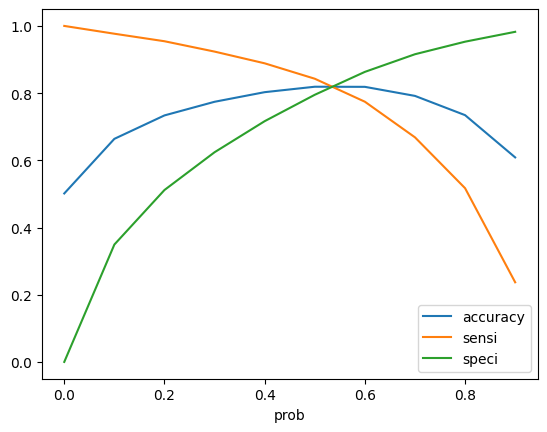

In [287]:
# Plotting accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensi','speci'])
plt.show()

we find that the optimal value is 0.5 for our model.

In [289]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predicting on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  predicted
29054      1    0.738802          1
8652       0    0.352548          0
34178      1    0.848287          1
12526      1    0.900711          1
27012      0    0.035032          0

In [290]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

# The overall accuracy

print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

[[6412 1627]
 [1275 6661]]

Accuracy : 0.8183411580594679


In [291]:
# Top 10 predictors

abs(res.params).sort_values(ascending = False)[0:11]

loc_ic_mou_8          1.772857
const                 1.562471
monthly_3g_8          0.737385
gd_ph_loc_ic_mou      0.698923
total_mou_8           0.611863
monthly_2g_8          0.585255
sachet_2g_8           0.578455
total_rech_num_8      0.551031
last_day_rch_amt_8    0.478093
loc_og_mou_8          0.470888
gd_ph_std_og_mou      0.467002
dtype: float64

In [292]:
# Here we find that accuracy of the train set and test set to be 81.9% and 81.13% respectively.

In [293]:
# we observe that most of the important features are in the action phase.So we need to concentrate more on those.

### Model building using Decision tree

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size = 0.7, random_state = 25)

In [296]:
from sklearn.tree import DecisionTreeClassifier

# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.8904091213950369
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      8039
           1       0.83      0.87      0.85      7936

    accuracy                           0.85     15975
   macro avg       0.85      0.85      0.85     15975
weighted avg       0.85      0.85      0.85     15975



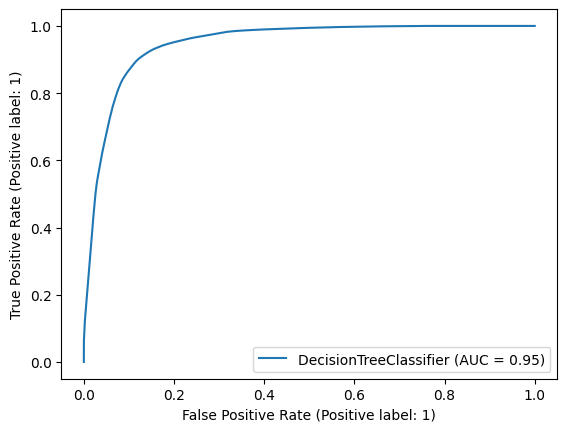

In [325]:
# Plotting ROC curve
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(intial_dt, X_train, y_train)
plt.show()

### hyperparameter tuning

In [299]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state = 42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator = dt,
                           param_grid = params,
                           cv = 4,
                           n_jobs = -1, verbose = 1, scoring = "accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [300]:
grid_search.best_score_

0.8751981068756105

In [301]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, random_state=42)

In [302]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      8039
           1       0.86      0.92      0.89      7936

    accuracy                           0.89     15975
   macro avg       0.89      0.89      0.89     15975
weighted avg       0.89      0.89      0.89     15975



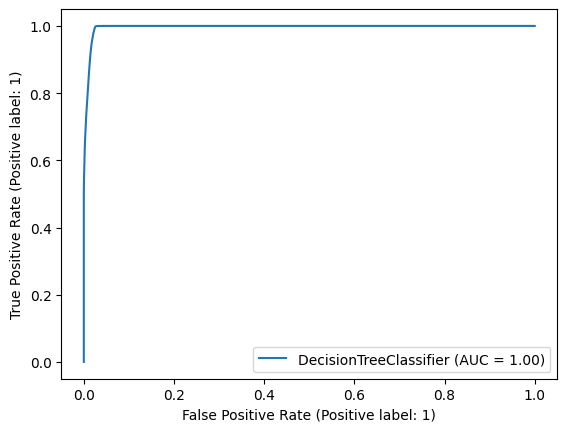

In [303]:
# ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt_best, X_train, y_train)
plt.show()

In [304]:
# We are getting an accuracy of around 89% using decision tree

### Model building using Random forest

Train accuracy : 0.8904091213950369
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      8039
           1       0.88      0.88      0.88      7936

    accuracy                           0.88     15975
   macro avg       0.88      0.88      0.88     15975
weighted avg       0.88      0.88      0.88     15975



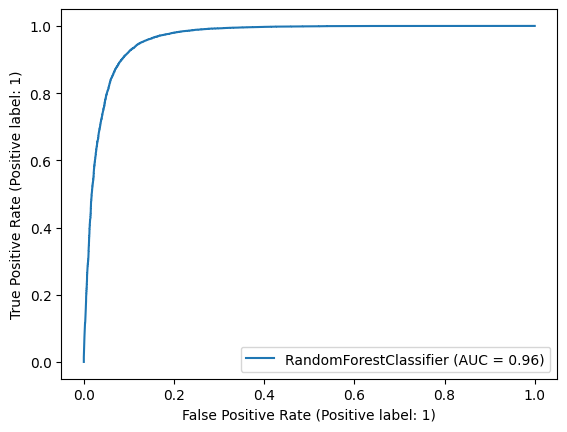

In [306]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

# Plotting ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

### Hyperparameter tuning

In [309]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)    

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [310]:
grid_search.best_score_

0.9275922968446092

In [311]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [312]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8039
           1       0.93      0.95      0.94      7936

    accuracy                           0.94     15975
   macro avg       0.94      0.94      0.94     15975
weighted avg       0.94      0.94      0.94     15975



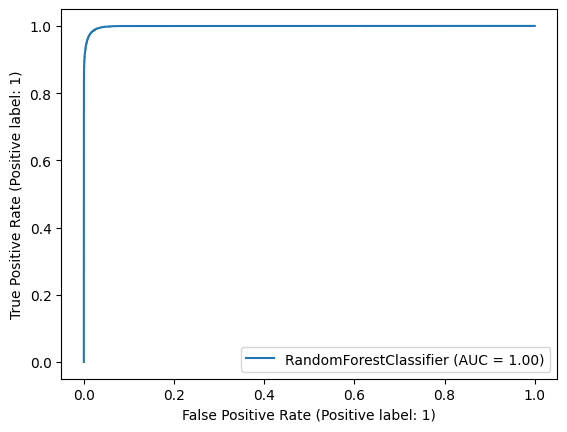

In [313]:
RocCurveDisplay.from_estimator(rf_best, X_train, y_train)
plt.show()

### observation from Random forest model:

In [317]:
# Here we get an accuracy of 94% on test data with Random forest.

In [318]:
## When we compare the models trained we can see the tuned random forest is performing the best, which is highest accuracy along with highest recall i.e. 95%. So, we will go with random forest

In [319]:
# Given our business problem, to retain their customers, we need higher recall. 
# As giving an offer to an user not going to churn will cost less as compared to loosing a customer and bring new customer, we need to have high rate of correctly identifying the true positives, hence recall.

In [320]:
final_model = RandomForestClassifier(max_depth = 30, min_samples_leaf = 5, n_jobs = -1, random_state = 25)

In [321]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)



# Print the report
print("Report on train data")
print(metrics.classification_report(y_train, y_train_pred))

print("Report on test data")
print(metrics.classification_report(y_test, y_test_pred))

Report on train data
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18586
           1       0.97      0.99      0.98     18689

    accuracy                           0.98     37275
   macro avg       0.98      0.98      0.98     37275
weighted avg       0.98      0.98      0.98     37275

Report on test data
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8039
           1       0.93      0.95      0.94      7936

    accuracy                           0.94     15975
   macro avg       0.94      0.94      0.94     15975
weighted avg       0.94      0.94      0.94     15975



### Top 10 Predictors:

1. loc_ic_mou_8 
2.monthly_3g_8 
3.gd_ph_loc_ic_mou
4.total_mou_8
5.monthly_2g_8
6.sachet_2g_8  
7.total_rech_num_8
8.last_day_rch_amt_8 
9.loc_og_mou_8 
10.gd_ph_std_og_mou

### Recommendation:

#1,we can see most of the predictors are from action phase.

#2.Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).

#3.Concenrate on those customers whose monthly 3g recharge and monthly 2G recharge in the month of August as they are more likely to get churned.Roll out some offers to those customers.

#4.Users that have been with the network less than 4 years, should be monitored time to time, as from data we can see that users who have been associated with the network for less than 4 years tend to churn more.

#5.MOU is one of the major factors, but data especially VBC if the user is not using a data pack if another factor to look out.
